In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans
from pprint import pprint

%matplotlib inline

In [2]:
url = "https://en.wikipedia.org/wiki/Nasdaq-100"
# Get the current Nasdag constituents
nasdaq_constituents = pd.read_html(url)[3]
# Tickers
tickers = nasdaq_constituents.Ticker.to_list()

In [3]:
df = yf.download(tickers=tickers, start="2013-01-02")

[*********************100%***********************]  102 of 102 completed


In [4]:
df = df['Adj Close'].reset_index()
df

,Date,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
0,2013-01-02,16.914259,NaN,38.340000,35.427647,41.615791,36.939999,31.069305,28.400000,10.216397,...,7.072000,25.120710,51.876598,39.849998,43.650002,29.825567,52.910000,20.293861,NaN,NaN
1,2013-01-03,16.700766,NaN,37.750000,34.855968,41.779716,36.369999,31.047949,29.170000,10.190509,...,6.954000,24.794161,52.473892,40.029999,45.150002,29.613989,52.299999,20.234568,NaN,NaN
2,2013-01-04,16.235569,NaN,38.130001,34.235992,42.150326,36.360001,30.998131,29.309999,10.190509,...,6.880000,24.739738,52.385769,40.040001,45.849998,29.135956,52.189999,20.308691,NaN,NaN
3,2013-01-07,16.140070,NaN,37.939999,34.340652,41.986397,36.090000,30.870007,28.940001,10.069707,...,6.868000,24.817490,52.150768,40.060001,47.290001,29.802057,52.169998,20.093742,NaN,NaN
4,2013-01-08,16.183510,NaN,38.139999,33.986374,42.228729,36.299999,30.713408,28.250000,9.931649,...,6.736000,24.529821,52.777439,39.889999,48.500000,29.911766,51.869999,20.130800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,2022-05-11,146.500000,116.150002,379.329987,151.990005,208.529999,180.679993,99.779999,256.109985,103.919998,...,734.000000,164.690002,174.399994,166.940002,234.960007,43.349998,173.139999,73.970001,84.800003,136.570007
2357,2022-05-12,142.559998,115.940002,388.489990,152.889999,207.479996,185.050003,98.529999,259.529999,106.760002,...,728.000000,165.899994,173.660004,164.410004,240.850006,43.160000,171.919998,73.550003,84.970001,137.630005
2358,2022-05-13,147.110001,121.449997,405.450012,158.740005,208.789993,197.070007,99.690002,275.519989,111.860001,...,769.590027,169.740005,176.210007,165.110001,246.720001,43.549999,182.289993,74.489998,94.839996,153.229996
2359,2022-05-16,145.539993,114.440002,402.859985,157.440002,208.600006,192.580002,99.389999,274.200012,110.480003,...,724.369995,168.500000,171.990005,164.550003,254.169998,44.150002,176.059998,74.830002,88.919998,140.080002


In [5]:
# Drop the dates
df.drop(['Date'], axis=1, inplace=True)
# Show the data
df

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
0,16.914259,NaN,38.340000,35.427647,41.615791,36.939999,31.069305,28.400000,10.216397,2.530000,...,7.072000,25.120710,51.876598,39.849998,43.650002,29.825567,52.910000,20.293861,NaN,NaN
1,16.700766,NaN,37.750000,34.855968,41.779716,36.369999,31.047949,29.170000,10.190509,2.490000,...,6.954000,24.794161,52.473892,40.029999,45.150002,29.613989,52.299999,20.234568,NaN,NaN
2,16.235569,NaN,38.130001,34.235992,42.150326,36.360001,30.998131,29.309999,10.190509,2.590000,...,6.880000,24.739738,52.385769,40.040001,45.849998,29.135956,52.189999,20.308691,NaN,NaN
3,16.140070,NaN,37.939999,34.340652,41.986397,36.090000,30.870007,28.940001,10.069707,2.670000,...,6.868000,24.817490,52.150768,40.060001,47.290001,29.802057,52.169998,20.093742,NaN,NaN
4,16.183510,NaN,38.139999,33.986374,42.228729,36.299999,30.713408,28.250000,9.931649,2.670000,...,6.736000,24.529821,52.777439,39.889999,48.500000,29.911766,51.869999,20.130800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,146.500000,116.150002,379.329987,151.990005,208.529999,180.679993,99.779999,256.109985,103.919998,87.919998,...,734.000000,164.690002,174.399994,166.940002,234.960007,43.349998,173.139999,73.970001,84.800003,136.570007
2357,142.559998,115.940002,388.489990,152.889999,207.479996,185.050003,98.529999,259.529999,106.760002,87.059998,...,728.000000,165.899994,173.660004,164.410004,240.850006,43.160000,171.919998,73.550003,84.970001,137.630005
2358,147.110001,121.449997,405.450012,158.740005,208.789993,197.070007,99.690002,275.519989,111.860001,95.120003,...,769.590027,169.740005,176.210007,165.110001,246.720001,43.549999,182.289993,74.489998,94.839996,153.229996
2359,145.539993,114.440002,402.859985,157.440002,208.600006,192.580002,99.389999,274.200012,110.480003,94.239998,...,724.369995,168.500000,171.990005,164.550003,254.169998,44.150002,176.059998,74.830002,88.919998,140.080002


In [6]:
# Calculate the annual mean returns and variances
daily_returns = df.pct_change()
annuaL_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [7]:
# Create a new dataframe
df2 = pd.DataFrame(df.columns, columns=['Stock Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annuaL_mean_returns.values
# Show the data
df2

,Stock Symbols,Variances,Returns
0,AAPL,0.081092,0.272831
1,ABNB,0.333073,0.015103
2,ADBE,0.092806,0.298770
3,ADI,0.087292,0.207046
4,ADP,0.052866,0.201710
...,...,...,...
97,WBA,0.081954,0.084499
98,WDAY,0.149603,0.200337
99,XEL,0.039637,0.159541
100,ZM,0.463965,0.343171


In [8]:
df2 = df2.dropna()
df2

,Stock Symbols,Variances,Returns
0,AAPL,0.081092,0.272831
1,ABNB,0.333073,0.015103
2,ADBE,0.092806,0.298770
3,ADI,0.087292,0.207046
4,ADP,0.052866,0.201710
...,...,...,...
97,WBA,0.081954,0.084499
98,WDAY,0.149603,0.200337
99,XEL,0.039637,0.159541
100,ZM,0.463965,0.343171


In [9]:
# Use the Elbow method to determine optimal number of clusters to group the stocks
# Dimishing returns are no longer worth the cost of adding the stocks to the portfolio

X = df2[['Returns','Variances']].values

# Reshape to a 1D matrix
X1 = X.reshape(-1, 1)

In [10]:
# K-means inertia
inertia_list = []
for k in range(2, 16):
    # Create and train the model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    # Uses SSE
    inertia_list.append(kmeans.inertia_) 

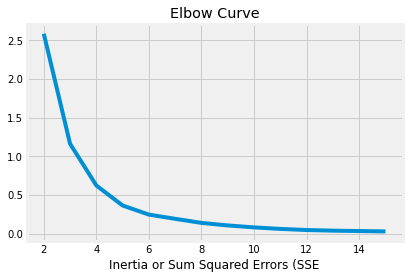

In [11]:
# Plot the data
plt.plot(range(2, 16), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.xlabel('Inertia or Sum Squared Errors (SSE')
plt.show()

In [12]:
# Get and show the labels/groups
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
labels

array([1, 3, 1, 3, 3, 1, 3, 1, 1, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 2,
       3, 3, 3, 1, 0, 3, 3, 1, 3, 0, 3, 0, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 1, 1, 3, 1, 3, 1, 3, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 3, 0, 0], dtype=int32)

In [13]:
len(labels)

102

In [14]:
df2['Cluster_Labels'] = labels
df2

,Stock Symbols,Variances,Returns,Cluster_Labels
0,AAPL,0.081092,0.272831,1
1,ABNB,0.333073,0.015103,3
2,ADBE,0.092806,0.298770,1
3,ADI,0.087292,0.207046,3
4,ADP,0.052866,0.201710,3
...,...,...,...,...
97,WBA,0.081954,0.084499,3
98,WDAY,0.149603,0.200337,3
99,XEL,0.039637,0.159541,3
100,ZM,0.463965,0.343171,0


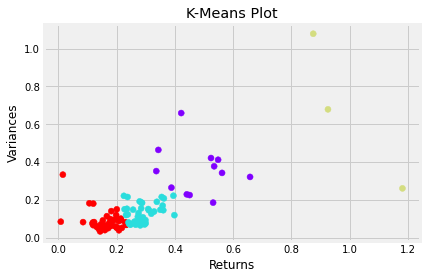

In [16]:
# Plot and show the different clusters
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

In [19]:
# Create a function to build a divserse portfolio
def diversified_port():
   for i in range(0,4):
       symbol = df2[df2['Cluster_Labels'] == i].head(1)
       print(symbol[['Stock Symbols', 'Cluster_Labels']]) 

In [20]:
diversified_port()

  Stock Symbols  Cluster_Labels
9           AMD               0
  Stock Symbols  Cluster_Labels
0          AAPL               1
   Stock Symbols  Cluster_Labels
21           CEG               2
  Stock Symbols  Cluster_Labels
1          ABNB               3
